In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip install imbalanced-learn


In [ ]:

# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [139]:
#utilites
import re
import numpy as np 
import pandas as pd 

#plotting 
import seaborn as sns 
import matplotlib.pyplot as plt

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import  svm
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#imblanced learn 
import imblearn
from imblearn.over_sampling import SMOTE

#warning 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('punkt');
nltk.download('wordnet');
nltk.download('stopwords');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("products.csv" ,encoding="utf-8", skipinitialspace=True)
df.head()

,title,url,category
0,\r\n Sony PlayS...,https://2b.com.eg/en/ps5-standard-edition-cfi-...,Gaming
1,\r\n Sony Media...,https://2b.com.eg/en/media-remote-cfi-zmr1bx-i...,Gaming
2,\r\n PlayStatio...,https://2b.com.eg/en/playstation-5-dual-sense-...,Gaming
3,\r\n Sony Origi...,https://2b.com.eg/en/sony-original-game-pad-du...,Gaming
4,\r\n Sony Dual ...,https://2b.com.eg/en/dual-sense-charging-stati...,Gaming


In [ ]:
#columns/features 
df.columns

Index(['title', 'url', 'category'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 3790


In [ ]:
# data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3790 non-null   object
 1   url       3790 non-null   object
 2   category  3790 non-null   object
dtypes: object(3)
memory usage: 89.0+ KB


In [ ]:
df.isna().sum()

title       0
url         0
category    0
dtype: int64

**list all the unique values of the category to make sure that all categories exists**

In [ ]:
df['category'].unique()

array(['Gaming', 'Home Appliances', 'Accessories', 'Computers',
       'Mobile & Tablet'], dtype=object)

**Data visualization of the tagert column**

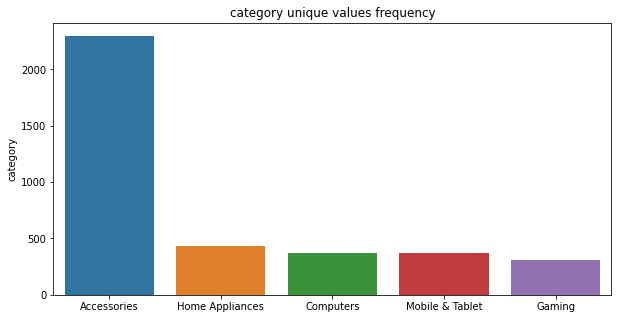

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.category.value_counts().index, y=df.category.value_counts())
plt.title("category unique values frequency")
plt.show();


**Remove the Leading text from the dataset**






In [ ]:
 
def removing_leading_whitespaces(text):
     return re.sub(r"^\s+","",text)

df['title'] = df['title'].apply(removing_leading_whitespaces)
df['title'] = df['title'].str.strip()

df.head(5)


,title,url,category
0,Sony PlayStation 5 Standard 1 TB (Official wa...,https://2b.com.eg/en/ps5-standard-edition-cfi-...,Gaming
1,Sony Media Remote CFI-ZMR1BX - IBS Warranty,https://2b.com.eg/en/media-remote-cfi-zmr1bx-i...,Gaming
2,PlayStation 5 Dual Sense - Red - (IBS Warranty),https://2b.com.eg/en/playstation-5-dual-sense-...,Gaming
3,Sony Original Game Pad Dual Sense PlayStation ...,https://2b.com.eg/en/sony-original-game-pad-du...,Gaming
4,Sony Dual Sense Charging Station CFI-ZDS1E - I...,https://2b.com.eg/en/dual-sense-charging-stati...,Gaming


**will try to handle unblanced data using two methods**


1.   Taking equel random subset from each category 
2.   Oversampling and Undersampling



1- **take equel random sampls from each category**

In [ ]:
computers = df[df['category']=='Computers'].sample(n =309)
mobile = df[df['category']=='Mobile & Tablet'].sample(n =309)
gaming =df[df['category']=='Gaming'].sample(n =309)
home = df[df['category']=='Home Appliances'].sample(n =309)
accessories =df[df['category']=='Accessories'].sample(n =309)

In [ ]:
balanced_df = pd.DataFrame()
balanced_df  =balanced_df.append([computers,mobile,gaming,home,accessories])
balanced_df =balanced_df[['title','category']]

In [ ]:
print("the value counts of balanced datasets \n",balanced_df['category'].value_counts(),end="\n")
print("="*40)
print("the leanght of the dataset is ",len(balanced_df))
print("="*40)
balanced_df.head()

the value counts of balanced datasets 
 Accessories        309
Gaming             309
Computers          309
Home Appliances    309
Mobile & Tablet    309
Name: category, dtype: int64
the leanght of the dataset is  1545


,title,category
1390,Lenovo IdeaPad S145 ( Intel® Core™I3-1005G1 - ...,Computers
876,Apple MacBook Air (Apple M1 chip with 8-core C...,Computers
150,TP-Link Wi-Fi Range Extender 300Mbps (TL-WA855RE),Computers
598,Hikvision M200S (STD) 64 GB USB Flash Drive,Computers
583,Canon WS-1210T EMEA HB 0694B001AC,Computers


In [ ]:
lemma = WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

def Clean_text(txt):

  cleaned_txt = re.sub(r'http\S+','',txt)
  cleaned_txt =re.sub('[^a-zA-Z]',' ',txt)
  cleaned_txt= str(cleaned_txt).lower()

  token_txt = word_tokenize(cleaned_txt)
  no_stop_txt = [item for item in token_txt if item not in stop_words] 
  lem= [lemma.lemmatize(word=w,pos='v') for w in no_stop_txt]
  lem = [i for i in lem if len(i) > 2]

  return ' '.join(lem)
balanced_df ['title']= balanced_df ['title'].apply(Clean_text)
balanced_df ['title'].head()

1390    lenovo ideapad intel core intel graphics win grey
876     apple macbook air apple chip core cpu core gpu...
150                              link range extender mbps
598                         hikvision std usb flash drive
583                                            canon emea
Name: title, dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(balanced_df['category'])
le_name_mapping = dict(zip(le.transform(le.classes_),le.classes_))
print(le_name_mapping)

{0: 'Accessories', 1: 'Computers', 2: 'Gaming', 3: 'Home Appliances', 4: 'Mobile & Tablet'}


In [ ]:
balanced_df['category'] =le.fit_transform(balanced_df['category'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
 balanced_df['title'],balanced_df['category'], test_size=0.33, random_state=42)

In [ ]:
balanced_df['category'].sample(5)

333     3
1617    3
1707    0
1274    1
110     0
Name: category, dtype: int64

In [ ]:
balanced_df['category'].unique()

array([1, 4, 2, 3, 0])

In [ ]:

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform( X_train)
test_vectors = vectorizer.transform(X_test)

**modeling**


*   Logistic Regression 





In [ ]:

lr = LogisticRegression()
lr.fit(train_vectors,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(test_vectors,y_test)


0.9176470588235294

**supoort vector machine**

In [ ]:

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_vectors,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_svm =SVM.predict(test_vectors)

In [ ]:
SVM.score(test_vectors,y_test)

0.9196078431372549

In [ ]:
new_text = "Lenovo-IdeaPad+5+14ITL05+%28Intel%C2%AE+Core%E2%84%A2+i5+-+1135G7+-+8GB+-++512GBSSD+-+Intel+Iris+Xe+Graphics+-+14.0%22FHD+%29+Gray"
new_text = Clean_text(new_text)
print(new_text)
p = SVM.predict(vectorizer.transform([new_text]))[0]
print('the category of this product is ' ,le_name_mapping[p])

lenovo ideapad itl intel core gbssd intel iris graphics fhd gray
the category of this product is  Computers


**save the model**

In [ ]:
import pickle
Pkl_Filename = "SVM_CLS.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(SVM, file)

In [ ]:
filename = 'SVM_CLS.pkl'
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
loaded_model.predict(vectorizer.transform([new_text]))

array([1])

In [ ]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

**OverSampling** 

In [ ]:

oversample =SMOTE()

smote_df = df[['title','category']]
smote_df['title']= smote_df['title'].apply(Clean_text) 

le.fit(smote_df['category'])
smote_df['category'] =le.fit_transform(smote_df['category'])

X = smote_df['title']
y = smote_df['category']

X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.33, random_state=42)

smote_train_vectors = vectorizer.fit_transform(X_train)
smote_test_vectors = vectorizer.transform(X_test)

oversample = SMOTE()
smote_train_vectors, y_train = oversample.fit_resample(smote_train_vectors, y_train)

smote_lr = LogisticRegression()
smote_lr.fit(smote_train_vectors,y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#training score 
print(smote_lr.score(smote_train_vectors,y_train))

0.9716666666666667


In [ ]:
#test score
print(smote_lr.score(smote_test_vectors ,y_test))
smote_preds = smote_lr.predict(smote_test_vectors)
print("the f1 score is ",f1_score(y_test,smote_preds,average='micro')) 

0.9320543565147882
the f1 score is  0.9320543565147882


**Cost-Sensitive Learning for Multi-Class Classification**

In [152]:
# note the df is the origiional unbalnced dataset
from numpy import mean
from numpy import std

rf_df = df[['title','category']]

rf_df['title']= rf_df['title'].apply(Clean_text)

#label to encode target varaibles 
le.fit(rf_df['category'])
rf_df['category'] =le.fit_transform(rf_df['category']) 

#split into output and out put elements 
X =rf_df['title']
y =rf_df['category']

X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.33, random_state=42)

rf_train_vectors = vectorizer.fit_transform(X_train)
rf_test_vectors = vectorizer.transform(X_test)

# evaluate a model
def evaluate_model(X_train, y_train, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

weights = {0:1.0, 1:3.0, 2:3.0, 3:3.0, 4:3.0}

model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(rf_train_vectors, y_train, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


Mean Accuracy: 0.917 (0.007)


In [158]:
weights = {0:1.0, 1:3.0, 2:3.0, 3:3.0, 4:3.0}

rf_model= RandomForestClassifier(n_estimators=1000, class_weight=weights)
rf_model.fit(rf_train_vectors ,y_train)
print("the train score is",rf_model.score( rf_train_vectors,y_train))
print("the test score is",rf_model.score( rf_test_vectors,y_test))


the train score is 0.9740055139818826
the test score is 0.9120703437250199
